# Qn 2

Name: Tan Wen Tao Bryan<br>
Class: DAAA/FT/2A/01<br>
StudentID: p2214449

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
data = pd.read_excel("./cars_9.xlsx")
display(data)

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,volvo,sedan,109.1,188.8,68.9,55.5,2952,4,141,9.5,114,23,28,16845
191,volvo,sedan,109.1,188.8,68.8,55.5,3049,4,141,8.7,160,19,25,19045
192,volvo,sedan,109.1,188.8,68.9,55.5,3062,4,141,9.5,114,19,25,22625
193,volvo,sedan,109.1,188.8,68.9,55.5,3012,6,173,8.8,134,18,23,21485


In [3]:
data_r = data.drop( ['Brand','Type'], axis = 1)
data_r.head()

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


### 1a)

In [4]:
# implementing PCA using sklearn
from sklearn.decomposition import PCA

#convert to standardized values as the symbols and magnitude are different
data_r = (data_r - data_r.mean())/data_r.std()
pca = PCA(n_components=12).fit(data_r)

#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_r)

In [5]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [6]:
pca_results = pca_results(data_r, pca)
pca_results

,Eigenvalue,Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.4025,0.6169,0.2750,0.3203,0.3211,0.1069,0.3512,0.2651,0.3315,0.0044,0.3065,-0.3127,-0.3222,0.3287
PC 2,2.0636,0.1720,-0.3882,-0.2562,-0.1903,-0.5242,-0.0935,0.2260,0.1345,-0.4762,0.3046,-0.2087,-0.1577,0.0821
PC 3,1.0965,0.0914,-0.1284,-0.1378,0.0434,-0.3313,0.0387,0.3976,0.2672,0.6076,0.0419,0.3222,0.3045,0.2334
PC 4,0.4388,0.0366,-0.0241,-0.1259,-0.2435,0.6322,-0.1529,0.5416,0.1508,-0.3181,-0.0284,0.1920,0.1710,0.1305
PC 5,0.3332,0.0278,-0.4290,-0.1276,-0.3894,0.3695,0.0658,-0.1898,-0.1122,0.4562,0.3134,-0.2802,-0.2211,0.1577
PC 6,0.1898,0.0158,-0.0212,0.0090,-0.0853,-0.0476,0.0288,0.5153,-0.0618,0.2380,-0.3471,-0.2548,-0.3839,-0.5747
PC 7,0.1369,0.0114,-0.2707,-0.2949,0.7181,0.1405,-0.2915,0.1343,-0.3693,0.0292,-0.0599,-0.0970,-0.1101,0.1975
PC 8,0.1112,0.0093,-0.3058,0.3496,0.2461,0.1089,0.0331,0.0802,-0.0340,-0.0241,0.5576,0.1367,0.2774,-0.5442
PC 9,0.0858,0.0071,-0.1724,0.7112,-0.1795,-0.1427,-0.3011,0.1824,-0.3364,0.0089,-0.1692,-0.1499,0.1280,0.3274
PC 10,0.0720,0.0060,-0.6025,0.1504,0.1535,0.0928,0.4233,-0.1499,0.3350,-0.1471,-0.4923,0.0228,0.0487,0.0386


Screeplot

<Figure size 432x288 with 0 Axes>

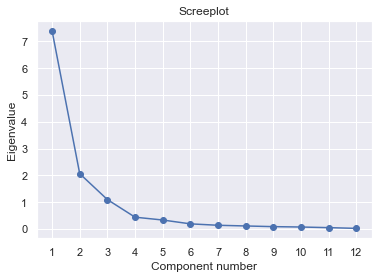

In [7]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker="o")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [8]:
#Extract only the three PCs
pca2 = PCA(n_components=3).fit(data_r)
scores2 = pca2.transform(data_r)

Loading Plot PC1 VS PC2

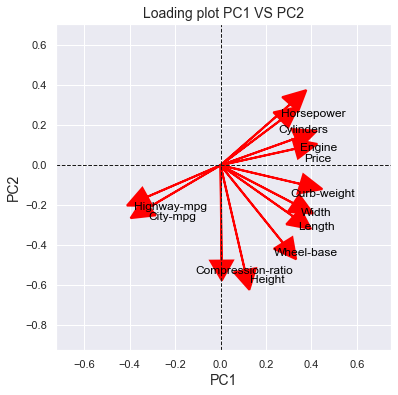

In [15]:
plt.clf
# loadingplot for PC1 against PC2
fig, ax = plt.subplots(figsize = (6,6))

#Set limits for figure
x_min = min(pca2.components_[0,:].min(),0)-0.4
x_max = max(pca2.components_[0,:].max(),0)+0.4
y_min = min(pca2.components_[1,:].min(),0)-0.4
y_max = max(pca2.components_[1,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.05

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    ax.text(v[0]+0.1, v[1]-text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_title("Loading plot PC1 VS PC2", fontsize = 14)
plt.show()

Loading Plot PC2 VS PC3

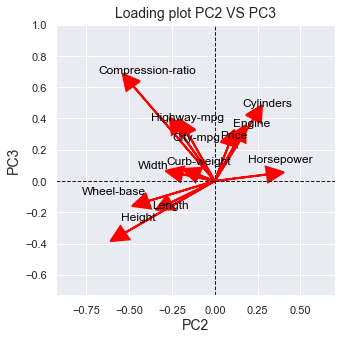

In [47]:
plt.clf
# loadingplot for PC2 against PC3
fig, ax = plt.subplots(figsize = (5,5))

#Set limits for figure
x_min = min(pca2.components_[1,:].min(),0)-0.4
x_max = max(pca2.components_[1,:].max(),0)+0.4
y_min = min(pca2.components_[2,:].min(),0)-0.4
y_max = max(pca2.components_[2,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.1

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[1], v[2], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    if data_r.columns[i] == "Highway-mpg":
        ax.text(v[1], v[2]+0.1, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "City-mpg":
        ax.text(v[1]+0.1, v[2]-0.04, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Wheel-base":
        ax.text(v[1]-0.2, v[2]+0.06, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Length":
        ax.text(v[1], v[2]-0.02, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Price":
        ax.text(v[1]+0.03, v[2]+0.06, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Width":
        ax.text(v[1]-0.17, v[2]+0.06, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Curb-weight":
        ax.text(v[1], v[2]+0.09, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    else:
        ax.text(v[1]+0.08, v[2]+text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC2", fontsize=14)
ax.set_ylabel("PC3", fontsize=14)
ax.set_title("Loading plot PC2 VS PC3", fontsize = 14)
plt.show()

Loading Plot PC1 VS PC3

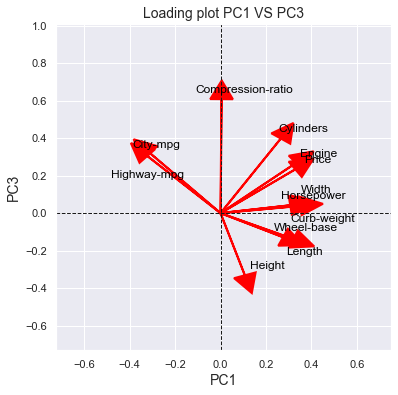

In [66]:
plt.clf
# loadingplot for PC1 against PC3
fig, ax = plt.subplots(figsize = (6,6))

#Set limits for figure
x_min = min(pca2.components_[0,:].min(),0)-0.4
x_max = max(pca2.components_[0,:].max(),0)+0.4
y_min = min(pca2.components_[2,:].min(),0)-0.4
y_max = max(pca2.components_[2,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.05

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[0], v[2], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    if data_r.columns[i] == "Highway-mpg":
        ax.text(v[0], v[2]-0.1, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "City-mpg":
        ax.text(v[0]+0.03, v[2]+0.04, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Length":
        ax.text(v[0]+0.05, v[2]-0.07, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Curb-weight":
        ax.text(v[0]+0.1, v[2]-0.07, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    elif data_r.columns[i] == "Width":
        ax.text(v[0]+0.1, v[2]+0.08, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    else:
        ax.text(v[0]+0.1, v[2]+text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC3", fontsize=14)
ax.set_title("Loading plot PC1 VS PC3", fontsize = 14)
plt.show()

In [67]:
#Obtain scores from original data that are not centred
scores_notcentred = np.dot(data_r, pca2.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2','PC3'])
scores_notcentred.head()

,PC1,PC2,PC3
0,-0.705354,2.384813,0.231644
1,-0.584352,2.415041,0.317554
2,1.495695,1.987229,0.553729
3,1.643993,0.730725,-0.742141
4,1.076594,0.797768,-0.428481


Score Plot PC1 VS PC2

In [71]:
#All unique values of the type
print(data.iloc[:,1].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


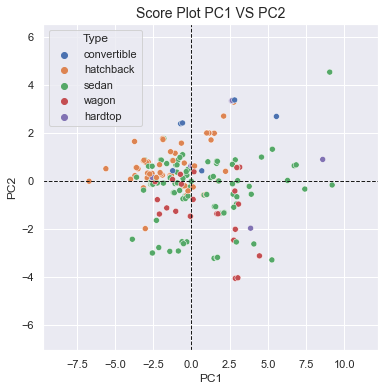

In [75]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC1", y="PC2", data = scores_notcentred, hue=data.iloc[:,1])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC1'].min(),0)-3
x_max = max(scores_notcentred['PC1'].max(),0)+3
y_min = min(scores_notcentred['PC2'].min(),0)-3
y_max = max(scores_notcentred['PC2'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC2", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

Score Plot PC2 VS PC3

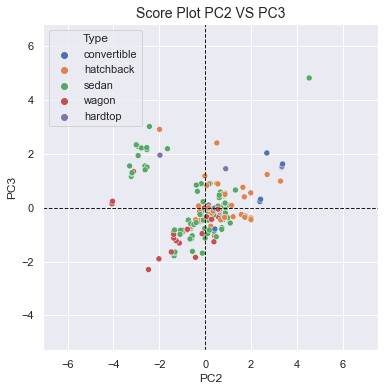

In [76]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC2", y="PC3", data = scores_notcentred, hue=data.iloc[:,1])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC2'].min(),0)-3
x_max = max(scores_notcentred['PC2'].max(),0)+3
y_min = min(scores_notcentred['PC3'].min(),0)-3
y_max = max(scores_notcentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC2 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

Score Plot PC1 VS PC3

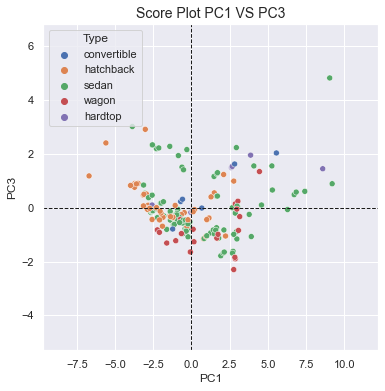

In [77]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC1", y="PC3", data = scores_notcentred, hue=data.iloc[:,1])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC1'].min(),0)-3
x_max = max(scores_notcentred['PC1'].max(),0)+3
y_min = min(scores_notcentred['PC3'].min(),0)-3
y_max = max(scores_notcentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()